##  Breast Cancer Dataset Analysis

##### Early and accurate diagnosis of breast cancer is crucial for a favorable clinical outcome. This project was developed to classify the tumors either benign or malignant. The dataset was obtained from Kaggle.

Tumors can be benign (noncancerous) or malignant (cancerous). Benign tumors usually grow slowly and do not spread to other organs. Malignant tumors generaly grow rapidly, invade to normal tissues, and spread throughout the body.

The features for this project are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These images describe the characteristics of the cell nucleus.

Diagnosis- 
- M = malignant
- B = benign

10 real-valued features are computed for each cell nucleus for diagnosis:

- Radius (mean of distances from center to points on the perimeter)
- Texture (standard deviation of gray-scale values)
- Perimeter
- Area
- Smoothness (local variation in radius lengths)
- Compactness (perimeter^2 / area - 1.0)
- Concavity (severity of concave portions of the contour)
- Concave points (number of concave portions of the contour)
- Symmetry
- Fractal dimension ("coastline approximation" - 1)

### Import libraries

In [177]:
import pandas as pd # for data manipulation and analysis
import numpy as np # for large, multi-dimensional arrays and matrices

import seaborn as sb # for data visualization
import matplotlib.pyplot as plt # for creating figure, plotting area, ploting lines, plot with labels, etc.
%matplotlib inline # for displaying plotting commands inline within Jupyter notebook, directly below the code cell
import itertools
from itertools import chain

from sklearn.feature_selection import RFE #Recursive Feature Elimination is a feature selection approach. Works by recursively removing attributes and building a model on those attributes that remain.
from sklearn.decomposition import PCA # for projecting the data to a lower dimensional space
from sklearn.preprocessing import StandardScaler # for subtracting the mean and then scaling to unit variance
from sklearn.linear_model import LogisticRegression # for predicting the probability of a categorical dependent variable
from sklearn.ensemble import VotingClassifier # for training on an ensemble of numerous models and predicts an output based on their highest probability of chosen class as the output.
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
import plotly.offline as py # to generate graphs offline and save them in local machin
py.init_notebook_mode(connected=True) # to display the plot inside the notebook
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff


UsageError: unrecognized arguments: # for displaying plotting commands inline within Jupyter notebook, directly below the code cell


### Read the data

In [178]:
df = pd.read_csv('F:/Projects/BC_Datasets.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

### Exploratory Data analysis

In [179]:
#columns name
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [180]:
# describe () for calculating some statistical data
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [181]:
# missing values
df.isnull()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    False      False        False         False           False      False   
1    False      False        False         False           False      False   
2    False      False        False         False           False      False   
3    False      False        False         False           False      False   
4    False      False        False         False           False      False   
..     ...        ...          ...           ...             ...        ...   
564  False      False        False         False           False      False   
565  False      False        False         False           False      False   
566  False      False        False         False           False      False   
567  False      False        False         False           False      False   
568  False      False        False         False           False      False   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0              False             False           False                False   
1              False             False           False                False   
2              False             False           False                False   
3              False             False           False                False   
4              False             False           False                False   
..               ...               ...             ...                  ...   
564            False             False           False                False   
565            False             False           False                False   
566            False             False           False                False   
567            False             False           False                False   
568            False             False           False                False   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...         False          False            False       False   
1    ...         False          False            False       False   
2    ...         False          False            False       False   
3    ...         False          False            False       False   
4    ...         False          False            False       False   
..   ...           ...            ...              ...         ...   
564  ...         False          False            False       False   
565  ...         False          False            False       False   
566  ...         False          False            False       False   
567  ...         False          False            False       False   
568  ...         False          False            False       False   

     smoothness_worst  compactness_worst  concavity_worst  \
0               False              False            False   
1               False              False            False   
2               False              False            False   
3               False              False            False   
4               False              False            False   
..                ...                ...              ...   
564             False              False            False   
565             False              False            False   
566             False              False            False   
567             False              False            False   
568             False              False            False   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                   False           False                    False  
1                   False           False                    False  
2                   False           False                    False  
3                   False           False                    False  
4                   False           False                    False  
..                    ...             ...                      ...  
564                 False           False            

In [182]:
# number of missing values in the data set
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [183]:
null_feat = pd.DataFrame(len(df['id']) - df.isnull().sum(), columns = ['Count'])

trace = go.Bar(x = null_feat.index, y = null_feat['Count'], opacity = 1,
marker = dict(color = 'red', line = dict(color = '#000000', width = 1)))

layout = dict(title = 'Missing Values')

figure = dict(data = [trace], layout = layout)
py.iplot(figure)

The features looking complete

#### Let's reassign the target. Malignant or M = 1, and Benign or B = 0

In [184]:
df.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)
df.head(2)

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302          1        17.99         10.38           122.8     1001.0   
1  842517          1        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33            184.6      2019.0   
1  ...         24.99          23.41            158.8      1956.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  

[2 rows x 32 columns]

In diagnosis column M is labelled as 1 and B is labelled as 0

#### Target distribution (number and %)

In [185]:
M = df[(df['diagnosis'] != 0)]
B = df[(df['diagnosis'] == 0)]

In [186]:
# Count
trace = go.Bar(x = (len(M), len(B)), y = ['malignant', 'benign'], orientation = 'h', opacity = 0.75, marker=dict(
        color=[ 'red', 'blue'],
        line=dict(color='#000000',width=1)))

layout = dict(title =  'Count of Diagnosis Variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

# Percentage
trace = go.Pie(labels = ['benign','malignant'], values = df['diagnosis'].value_counts(), 
               textfont=dict(size=10), opacity = 1,
               marker=dict(colors=['green', 'red'], 
                           line=dict(color='#000000', width=1)))


layout = dict(title =  'Distribution of Diagnosis Variable')
           
figure = dict(data = [trace], layout=layout)
py.iplot(figure)

#### Features distribution (hue = diagnosis)

In [189]:
def plot_distribution(data_select, size_bin) :  
    tmp1 = M[data_select]
    tmp2 = B[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['malignant', 'benign']
    colors = ['#FFD700', '#7EC0EE']

    figure = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    figure['layout'].update(title = data_select)

    py.iplot(figure, filename = 'Density plot')

In [191]:
# plot distribution 'mean'
plot_distribution('radius_mean', .25)
plot_distribution('texture_mean', .25)
plot_distribution('perimeter_mean', 2.5)
plot_distribution('area_mean', 5)

In [192]:
#plot distribution 'se'
plot_distribution('radius_se', .05)
plot_distribution('texture_se', .05)
plot_distribution('perimeter_se', .05)
plot_distribution('area_se', 2.5)
plot_distribution('smoothness_se', .25)
plot_distribution('compactness_se', .25)
plot_distribution('concavity_se', .25)
plot_distribution('concave points_se', .25)
plot_distribution('symmetry_se', .25)
plot_distribution('fractal_dimension_se', .25)

In [193]:
#plot distribution 'worst'
plot_distribution('radius_worst', .25)
plot_distribution('texture_worst', .25)
plot_distribution('perimeter_worst', 2.5)
plot_distribution('area_worst', 5)
plot_distribution('smoothness_worst', .25)
plot_distribution('compactness_worst', .25)
plot_distribution('concavity_worst', .25)
plot_distribution('concave points_worst', .25)
plot_distribution('symmetry_worst', .25)
plot_distribution('fractal_dimension_worst', .25)

### Let's draw correlation matrix

In [194]:
#correlation
correlation = df.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

In [195]:
#Plotting a heatmap
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   xgap = 1.5,
                   ygap = 1.5,
                   colorscale='Viridis',
                   colorbar   = dict() ,
                  )
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                        autosize = False,
                        height  = 500,
                        width   = 600,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 7)),
                        xaxis   = dict(tickfont = dict(size = 7)),
                       )
                  )
figure = go.Figure(data = [trace],layout = layout)
py.iplot(figure)

### Positively correlated features

In [196]:
def plot_feature1_feature2(feature1, feature2) :  
    trace0 = go.Scatter(
        x = M[feature1],
        y = M[feature2],
        name = 'malignant',
        mode = 'markers', 
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = B[feature1],
        y = B[feature2],
        name = 'benign',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    layout = dict(title = feature1 +" "+"vs"+" "+ feature2,
                  yaxis = dict(title = feature2,zeroline = False),
                  xaxis = dict(title = feature1, zeroline = False)
                 )

    plots = [trace0, trace1]

    figure = dict(data = plots, layout=layout)
    py.iplot(figure)

In [197]:
plot_feature1_feature2('perimeter_mean','radius_worst')
plot_feature1_feature2('area_mean','radius_worst')
plot_feature1_feature2('texture_mean','texture_worst')
plot_feature1_feature2('area_worst','radius_worst')

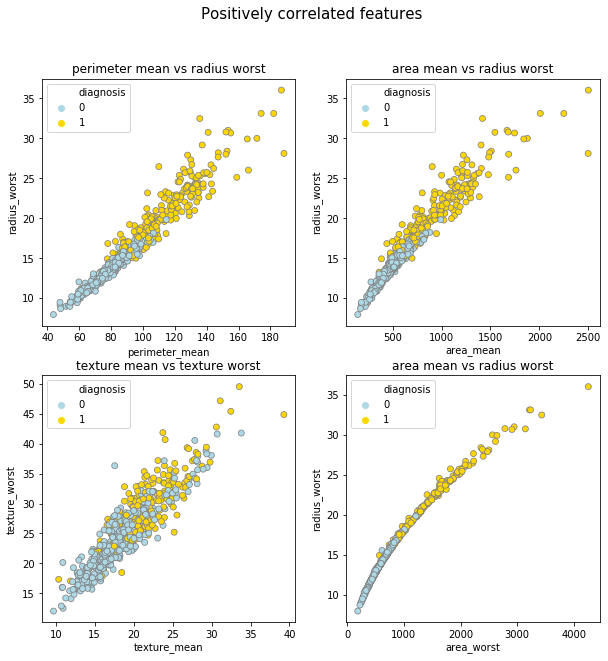

In [198]:
# by seaborn 

palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(10,10))

plt.subplot(221)
ax1 = sb.scatterplot(x = df['perimeter_mean'], y = df['radius_worst'], hue = "diagnosis",
                    data = df, palette = palette, edgecolor=edgecolor)
plt.title('perimeter mean vs radius worst')
plt.subplot(222)
ax2 = sb.scatterplot(x = df['area_mean'], y = df['radius_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')
plt.subplot(223)
ax3 = sb.scatterplot(x = df['texture_mean'], y = df['texture_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs texture worst')
plt.subplot(224)
ax4 = sb.scatterplot(x = df['area_worst'], y = df['radius_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')

fig.suptitle('Positively correlated features', fontsize = 15)
plt.savefig('1')
plt.show()

### Uncorrelated features

In [199]:
plot_feat1_feat2('smoothness_mean','texture_mean')
plot_feat1_feat2('radius_mean','fractal_dimension_worst')
plot_feat1_feat2('texture_mean','symmetry_mean')
plot_feat1_feat2('texture_mean','symmetry_se')

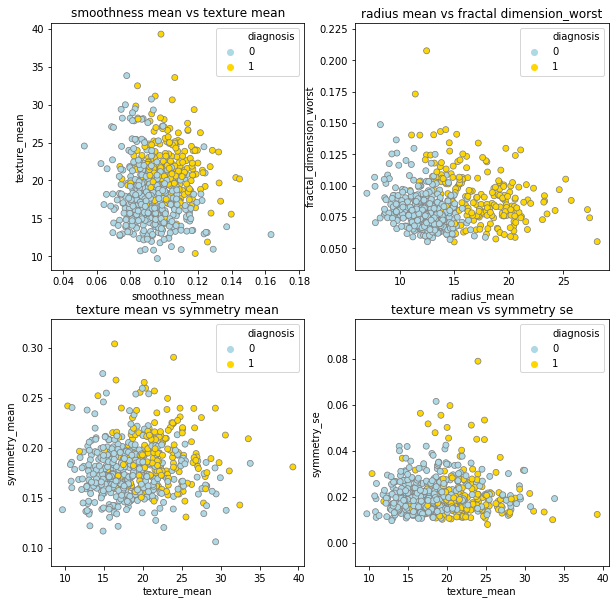

In [207]:
# by seaborn

figure = plt.figure(figsize=(10,10))

plt.subplot(221)
ax1 = sb.scatterplot(x = df['smoothness_mean'], y = df['texture_mean'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('smoothness mean vs texture mean')
plt.subplot(222)
ax2 = sb.scatterplot(x = df['radius_mean'], y = df['fractal_dimension_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('radius mean vs fractal dimension_worst')
plt.subplot(223)
ax3 = sb.scatterplot(x = df['texture_mean'], y = df['symmetry_mean'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry mean')
plt.subplot(224)
ax4 = sb.scatterplot(x = df['texture_mean'], y = df['symmetry_se'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry se')

fig.suptitle('Uncorrelated features', fontsize = 16)
plt.show()

### Negatively correlated features

In [208]:
plot_feat1_feat2('area_mean','fractal_dimension_mean')
plot_feat1_feat2('radius_mean','fractal_dimension_mean')
plot_feat1_feat2('area_mean','smoothness_se')
plot_feat1_feat2('smoothness_se','perimeter_mean')

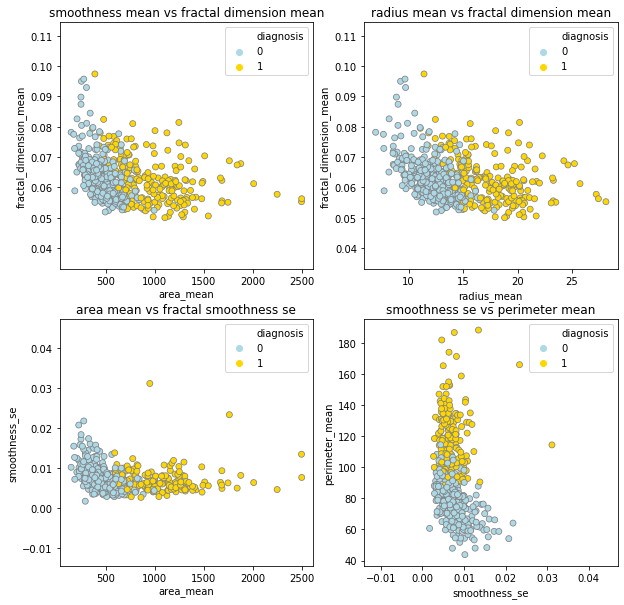

In [209]:
# by seaborn
figure = plt.figure(figsize=(10,10))

plt.subplot(221)
ax1 = sb.scatterplot(x = df['area_mean'], y = df['fractal_dimension_mean'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('smoothness mean vs fractal dimension mean')
plt.subplot(222)
ax2 = sb.scatterplot(x = df['radius_mean'], y = df['fractal_dimension_mean'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('radius mean vs fractal dimension mean')
plt.subplot(223)
ax2 = sb.scatterplot(x = df['area_mean'], y = df['smoothness_se'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs fractal smoothness se')
plt.subplot(224)
ax2 = sb.scatterplot(x = df['smoothness_se'], y = df['perimeter_mean'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('smoothness se vs perimeter mean')

fig.suptitle('Negatively correlated features', fontsize = 16)
plt.show()

### Principal Component Analysis (PCA)

#### Compute PCA 

In [210]:
target_pca = df['diagnosis']
data_pca = df.drop('diagnosis', axis=1)

target_pca = pd.DataFrame(target_pca)

#To make a PCA, normalize data is essential
X_pca = data_pca.values
X_std = StandardScaler().fit_transform(X_pca)

pca = PCA(svd_solver='full')
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std)
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True, how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})

#### PCA pie plot with 6 components

In [211]:
# variance 
var_pca = pd.DataFrame(pca.explained_variance_ratio_)
var_pca = var_pca.T

# SUM AND DROP COMP [7:30]
col_list = list(v for v in chain(pca_std.columns[6:30])) 
var_pca['OTHERS_COMP'] = var_pca[col_list].sum(axis=1)
var_pca.drop(var_pca[col_list],axis=1,inplace=True)
var_pca = var_pca.T

In [212]:
labels = ['COMP1','COMP2','COMP3','COMP4','COMP5','COMP6', 'COMP7 - 30']
colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white']

trace = go.Pie(labels = labels, values = var_pca[0].values, opacity = 1,
               textfont=dict(size=10),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=1)))


layout = dict(title =  'PCA : components and explained variance (6 comp = 88.8%)')
 
                   
figure = dict(data = [trace], layout=layout)
py.iplot(figure)

#### PCA scatter plot with 2 components (63.3%)

In [213]:
pca = PCA(n_components = 2)

pca_std = pca.fit(X_std, target_pca).transform(X_std)
pca_std = pd.DataFrame(pca_std,columns = ['COMP1','COMP2'])
pca_std = pca_std.merge(target_pca,left_index = True,right_index = True,how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})

In [214]:
def pca_scatter(target,color) :
    tracer = go.Scatter(x = pca_std[pca_std['diagnosis'] == target]['COMP1'] ,
                        y = pca_std[pca_std['diagnosis'] == target]['COMP2'],
                        name = target, mode = 'markers',
                        marker = dict(color = color,line = dict(width = 1))
                       )
    return tracer
layout = go.Layout(dict(title = 'PCA Scatter plot (2 comp = 63.3%)',
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = 'COMP1 = 44.3%',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = 'COMP2 = 19.0%',
                                     zerolinewidth=.5,ticklen=2.5,gridwidth=1),
                        height = 500
                       ))
trace1 = pca_scatter('malignant','#FFD700')
trace2 = pca_scatter('benign','#7EC0EE')
plots = [trace2,trace1]
figure = go.Figure(data = plots,layout = layout)
py.iplot(figure)

#### PCA scatter plot with 3 components (72.7%)

In [215]:
pca = PCA(n_components = 3)
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std,columns = ['COMP1','COMP2','COMP3'])
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True,how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})

In [216]:
M_pca = pca_std[(pca_std['diagnosis'] == 'malignant')]
B_pca = pca_std[(pca_std['diagnosis'] == 'benign')]

In [217]:
trace1 = go.Scatter3d(x = M_pca['COMP1'],
                      y = M_pca['COMP3'],
                      z = M_pca['COMP2'],
                      mode = "markers",
                      name = "malignant",
                      marker = dict(size = 4,color = '#FFD700',line = dict(width = 1))
                     )
trace2 = go.Scatter3d(x = B_pca['COMP1'],
                      y = B_pca['COMP3'],
                      z = B_pca['COMP2'],
                      name = 'benign',
                      mode = 'markers',
                      marker = dict(size = 4,color= '#7EC0EE',line = dict(width = 1))
                     )



layout = go.Layout(dict(title = 'PCA Scatter plot (3 comp = 72.7%)',
                        scene = dict(camera = dict(up=dict(x= 0 , y=0, z=0),
                                                   center=dict(x=0, y=0, z=0),
                                                   eye=dict(x=1.25, y=1.25, z=1.25)),
                                     xaxis  = dict(title = 'COMP1',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'),
                                     yaxis  = dict(title = 'COMP3',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  ),
                                     zaxis  = dict(title = 'COMP2',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  )),height = 500))
                  

plots = [trace1,trace2]
figure  = go.Figure(data = plots,layout = layout)
py.iplot(figure)

## Define functions
This part is essential to measure the performance of a model : roc, cross validation, learning curve

### Confusion matrix and other metrics
The confusion matrix, also known as the error matrix, allows visualization of the performance of an algorithm :

- true positive (TP) : Malignant tumour correctly identified as malignant
- true negative (TN) : Benign tumour correctly identified as benign
- false positive (FP) : Benign tumour incorrectly identified as malignant
- false negative (FN) : Malignant tumour incorrectly identified as benign

Metrics :
- Accuracy : (TP +TN) / (TP + TN + FP +FN)
- Precision : TP / (TP + FP)
- Recall : TP / (TP + FN)

In [218]:
# Confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Show metrics 
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

### Precision – Recall curve
Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds. Also, the precision-recall curve shows the tradeoff between precision and recall for different threshold

In [219]:
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

### ROC curve
The ROC curve shows the trade-off between sensitivity (or true positive rate (TPR)) and specificity (1 – false positive rate (FPR)). Created by plotting the TPR against the FPR at various threshold settings.

In [220]:
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 1)
    plt.plot([0,1],[0,1], 'k--', linewidth = 1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

### Learning curve
A learning curve is a plot of model learning performance over experience or time. It determines cross-validated training and test scores.

In [221]:
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r",
             label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g",
             label = "Cross-validation score")
    plt.legend(loc = "best")
    return plt

### Cross validation metrics
Technique which is used to evaluate the machine learning model by training it on the subset of the available data and then evaluating them on the remaining input data. in other words Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.

In [222]:
def cross_val_metrics(model) :
    scores = ['accuracy', 'precision', 'recall']
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))

### Prepare dataset

### Define (X, y) 
- y = diagnosis (target)
- X = features (radius_mean, area_se, ....)

In [223]:
y = np.array(df.diagnosis.tolist())
data = df.drop('diagnosis', 1)
X = np.array(data.as_matrix())

### Standard scaler (X)

In [224]:
# Normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Train test split

In [225]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.12, random_state = random_state)

### Predictive model : Logistic Regression

#### Logistic Regression and GridSearch CV to optimise hyperparameters (accuracy)

In [226]:
log_clf = LogisticRegression(random_state = random_state)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)
CV_log_clf.fit(X_train, y_train)

best_parameters = CV_log_clf.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The best parameters for using this model is {'C': 0.1, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done  35 out of  42 | elapsed:   18.5s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   18.5s finished


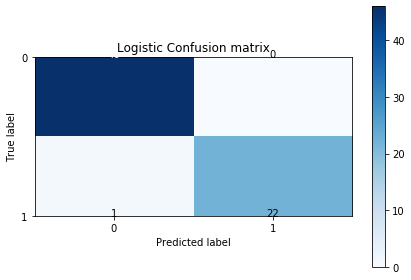

Accuracy  =     0.986
Precision =     1.000
Recall    =     0.957
F1_score  =     0.978


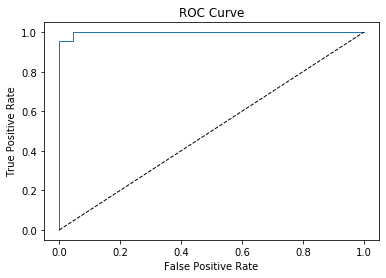

In [227]:
#Log with best hyperparameters
CV_log_clf = LogisticRegression(C = best_parameters['C'], 
                                penalty = best_parameters['penalty'], 
                                random_state = random_state)

CV_log_clf.fit(X_train, y_train)
y_pred = CV_log_clf.predict(X_test)
y_score = CV_log_clf.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Logistic Confusion matrix')
plt.savefig('6')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

### RFE : Recursive features elimination (30 features => 15 features)
Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model’s coef_ or feature_importances_

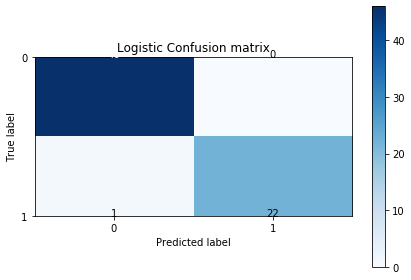

Accuracy  =     0.986
Precision =     1.000
Recall    =     0.957
F1_score  =     0.978


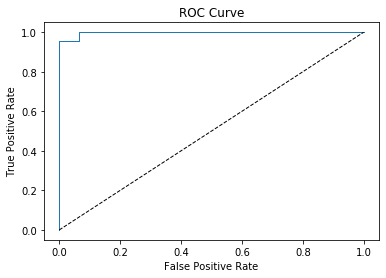

In [228]:
#Logistic regression with RFE
log_clf = LogisticRegression(C = best_parameters['C'], 
                                 penalty = best_parameters['penalty'], 
                                 random_state = random_state)

selector = RFE(log_clf)
selector = selector.fit(X_train, y_train)

y_pred = selector.predict(X_test)
y_score = selector.predict_proba(X_test)[:,1]


# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Logistic Confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

In [229]:
# support and ranking RFE
print(selector.support_)
print(selector.ranking_)

[False  True  True  True  True False False False  True False False  True
 False False  True False False False False False False  True  True  True
  True  True False  True  True  True False]
[15  1  1  1  1  8 16  4  1 12  7  1 17  2  1 10  5 14 13  9  3  1  1  1
  1  1  6  1  1  1 11]


#### Compare learning curves and cross validation scores

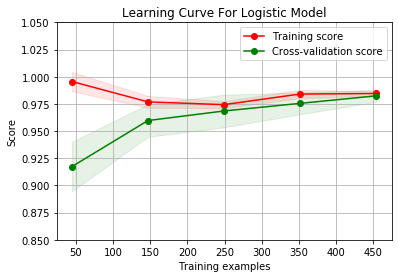

In [233]:
#Learning curve Log with best hyperpara
plot_learning_curve(CV_log_clf, 'Learning Curve For Logistic Model', X, y, (0.85,1.05), 5)
plt.show()

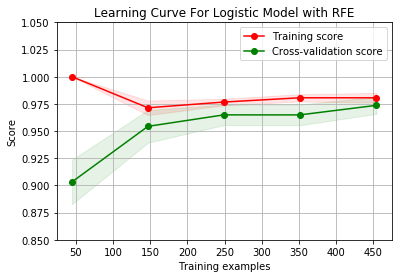

In [234]:
#Learning curve Log with RFE
plot_learning_curve(selector, 'Learning Curve For Logistic Model with RFE', X, y, (0.85,1.05), 5)
plt.show()

In [235]:
# Cross val Log 
cross_log = cross_val_metrics(CV_log_clf)

[accuracy] : 0.98242 (+/- 0.00560)
[precision] : 0.99036 (+/- 0.01181)
[recall] : 0.96235 (+/- 0.01131)


In [236]:
# Cross val Log with RFE
cross_selector = cross_val_metrics(selector)

[accuracy] : 0.97367 (+/- 0.00778)
[precision] : 0.98094 (+/- 0.01754)
[recall] : 0.94817 (+/- 0.01753)


With 15 features and 5 folds, we got 97 accuracy with a standard deviation of 0.78. To follow, we don't use the selector, the log cfl is most performant.

### Select threshold for a recall = 100% (all malignant tumors detected)
Correct identification of malignant tumors is crucial

Recall w/ threshold = 0.1 : 1.0
Recall w/ threshold = 0.2 : 0.9565217391304348
Recall w/ threshold = 0.3 : 0.9565217391304348
Recall w/ threshold = 0.4 : 0.9565217391304348
Recall w/ threshold = 0.5 : 0.9565217391304348
Recall w/ threshold = 0.6 : 0.9565217391304348
Recall w/ threshold = 0.7 : 0.9565217391304348
Recall w/ threshold = 0.8 : 0.8695652173913043
Recall w/ threshold = 0.9 : 0.782608695652174


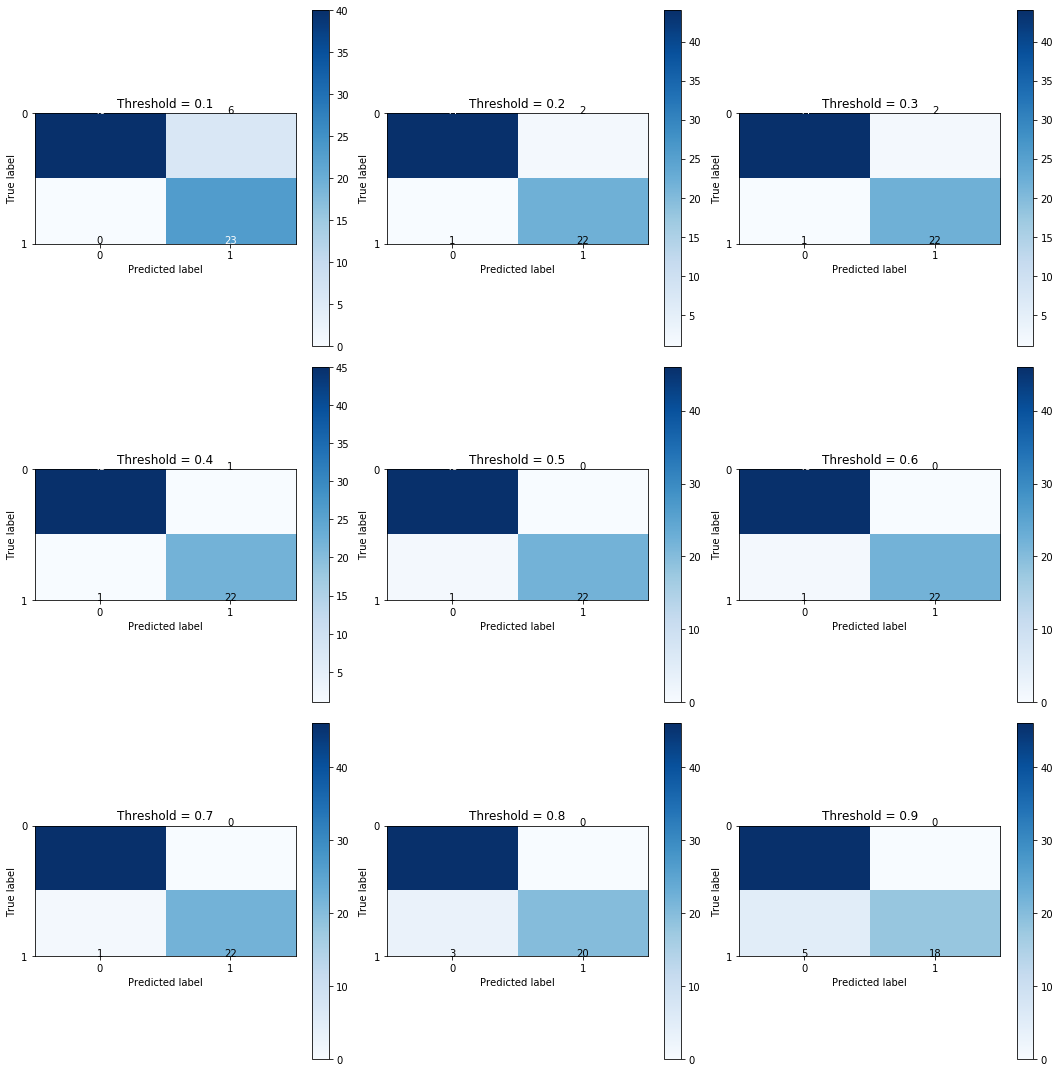

In [237]:
# Threshold
thresholds_adj = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize = (15,15))

j = 1
for i in thresholds_adj:
    y_score = CV_log_clf.predict_proba(X_test)[:,1] > i
    
    
    plt.subplot(3,3,j)
    j += 1
    
    cm = confusion_matrix(y_test, y_score)
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]

    print('Recall w/ threshold = %s :'%i, (tp/(tp+fn)))
    
    class_names = [0,1]
    plot_confusion_matrix(cm, 
                          classes=class_names, 
                          title='Threshold = %s'%i) 

### Predicting with recall = 100%

In [238]:
# Recall = 1.
y_score = CV_log_clf.predict_proba(X_test)[:,1] > 0.1
cm = confusion_matrix(y_test, y_score)
class_names = [0,1]
show_metrics()

Accuracy  =     0.913
Precision =     0.793
Recall    =     1.000
F1_score  =     0.885


With 2 models we can increase the precision while keeping a recall = 100%

### Predictive model 2 : Ensemble Classifier to maximise precision and detect all malignant tumors

### Logistic Regression and GridSearch CV to optimise hyperparameters (recall)

In [239]:
# Find the best parameters (recall)
log2_clf = LogisticRegression(random_state = random_state)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            }

CV_log2_clf = GridSearchCV(estimator = log2_clf, param_grid = param_grid , scoring = 'recall', verbose = 1, n_jobs = -1)
CV_log2_clf.fit(X_train, y_train)

best_parameters = CV_log2_clf.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The best parameters for using this model is {'C': 1, 'penalty': 'l1'}


[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    2.8s finished


In [240]:
# Log w best hyperparameters (recall)
CV_log2_clf = LogisticRegression(C = best_parameters['C'], 
                                 penalty = best_parameters['penalty'], 
                                 random_state = random_state)


CV_log2_clf.fit(X_train, y_train)

y_pred = CV_log2_clf.predict(X_test)
y_score = CV_log2_clf.decision_function(X_test)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]

- Grid search CV accuracy, penalty = l2
- Grid search CV recall, penalty = l

In [241]:
# Cross val log2
cross_val_metrics(CV_log2_clf)

[accuracy] : 0.97373 (+/- 0.01221)
[precision] : 0.97607 (+/- 0.01506)
[recall] : 0.95305 (+/- 0.02548)


### Voting classifier : log + log2

In [242]:
#Voting Classifier
voting_clf = VotingClassifier (
        estimators = [('log1', CV_log_clf), ('log_2', CV_log2_clf)],
                     voting='soft', weights = [1, 1])
    
voting_clf.fit(X_train,y_train)

y_pred = voting_clf.predict(X_test)
y_score = voting_clf.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
show_metrics()

Accuracy  =     0.971
Precision =     0.957
Recall    =     0.957
F1_score  =     0.957


In [243]:
# Cross val score voting
cross_voting = cross_val_metrics(voting_clf)

[accuracy] : 0.97547 (+/- 0.01147)
[precision] : 0.97619 (+/- 0.01506)
[recall] : 0.95770 (+/- 0.02288)


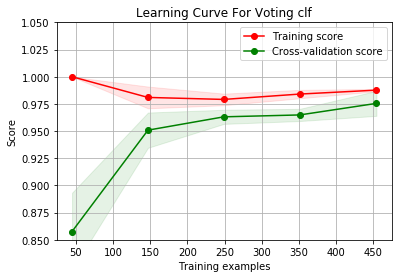

In [246]:
#Learning curve Voting
plot_learning_curve(voting_clf, 'Learning Curve For Voting clf', X, y, (0.85,1.05), 5)
plt.show()

### Voting classifier : select threshold (recall = 100%)

Recall w/ threshold = 0.1 : 1.0
Recall w/ threshold = 0.2 : 0.9565217391304348
Recall w/ threshold = 0.3 : 0.9565217391304348
Recall w/ threshold = 0.4 : 0.9565217391304348
Recall w/ threshold = 0.5 : 0.9565217391304348
Recall w/ threshold = 0.6 : 0.9565217391304348
Recall w/ threshold = 0.7 : 0.9565217391304348
Recall w/ threshold = 0.8 : 0.9130434782608695
Recall w/ threshold = 0.9 : 0.8260869565217391


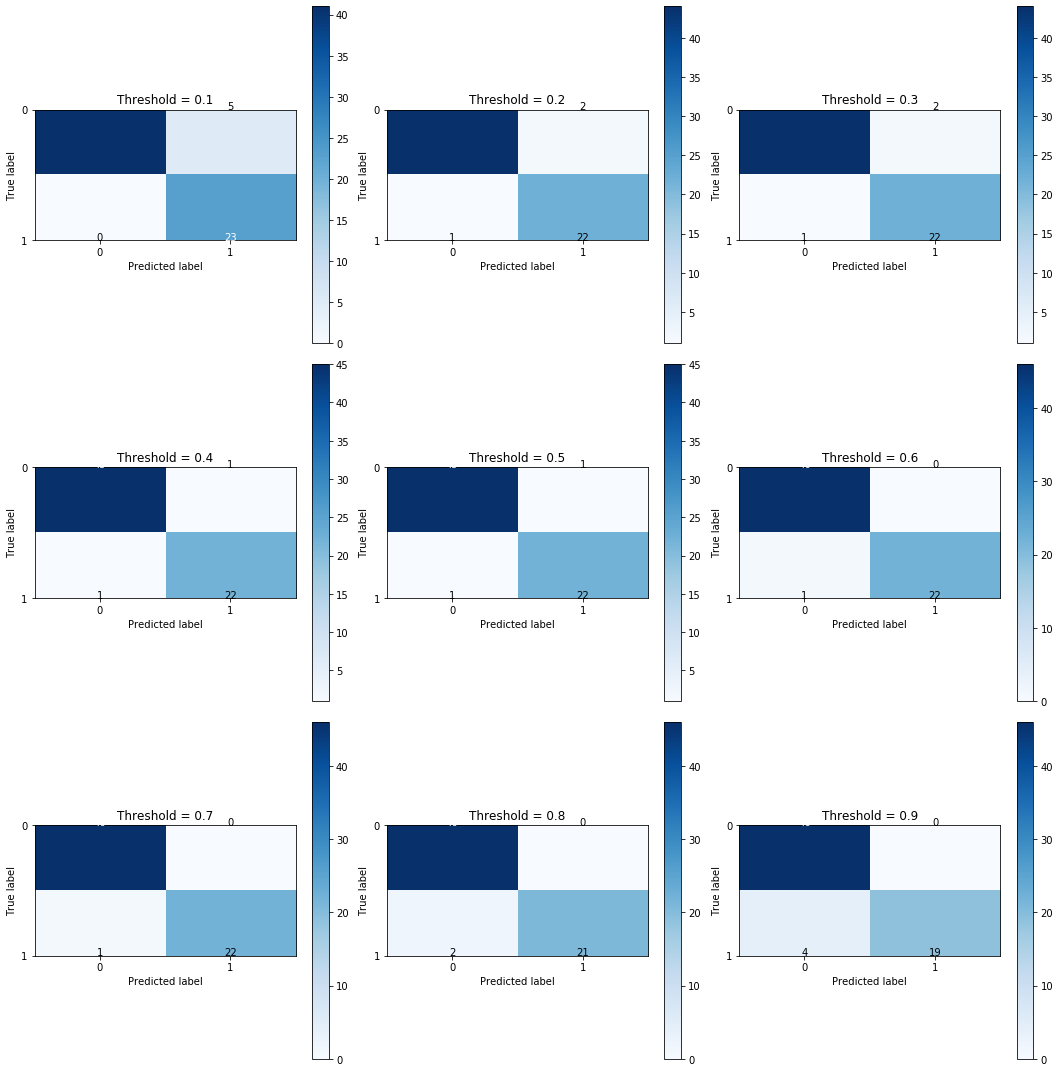

In [247]:
# Threshold
thresholds_adj = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize = (15,15))

j = 1
for i in thresholds_adj:
    y_score = voting_clf.predict_proba(X_test)[:,1] > i
    
    
    plt.subplot(3,3,j)
    j += 1
    
    cm = confusion_matrix(y_test, y_score)
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]

    print('Recall w/ threshold = %s :'%i, (tp/(tp+fn)))
    
    class_names = [0,1]
    plot_confusion_matrix(cm, 
                          classes=class_names, 
                          title='Threshold = %s'%i) 

### Voting classifier : predicting with recall = 100% (precision = 92%)

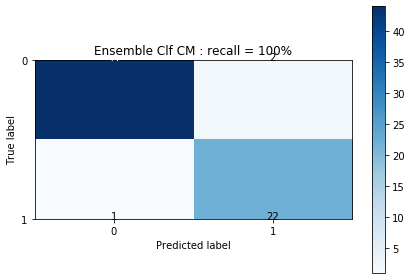

Accuracy  =     0.957
Precision =     0.917
Recall    =     0.957
F1_score  =     0.936


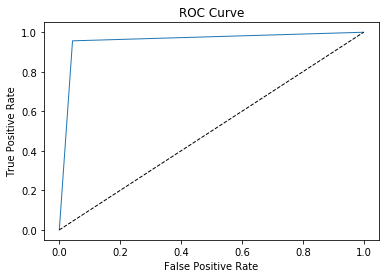

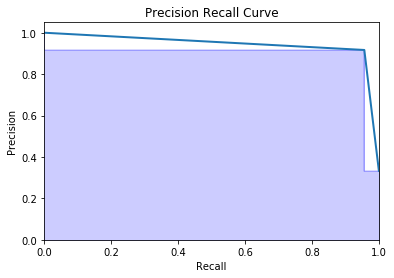

In [249]:
# Ensemble, recall = 1.
y_score = voting_clf.predict_proba(X_test)[:,1] > 0.23
cm = confusion_matrix(y_test, y_score)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'Ensemble Clf CM : recall = 100%')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

### Models performance plot (accuracy, precision, recall)

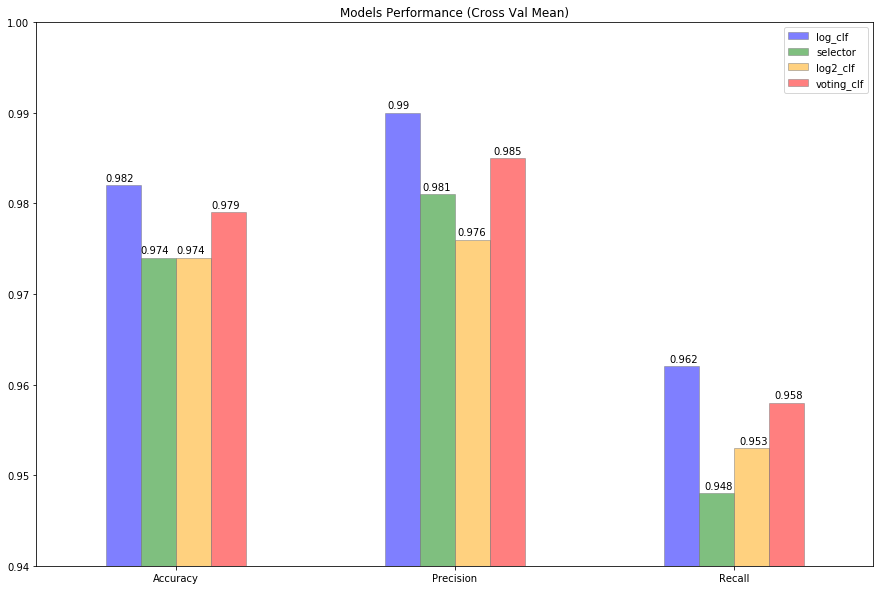

In [256]:
models_metrics = {'log_clf': [0.982, 0.990, 0.962], 
                 'selector': [0.974, 0.981, 0.948],
                 'log2_clf' : [0.974,0.976,0.953],
                 'voting_clf' : [0.979,0.985,0.958]
                }
df = pd.DataFrame(data = models_metrics)
df.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall'}, 
                 inplace=True)
ax = df.plot(kind='bar', figsize = (15,10), ylim = (0.94, 1), 
        color = ['blue', 'green', 'orange', 'red'],
        rot = 0, title ='Models Performance (Cross Val Mean)',
        edgecolor = 'grey', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()